<a href="https://colab.research.google.com/github/Smash08/ProjetoAIrBnb/blob/main/Projeto_AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - Rio de Janeiro

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Em 2018, a Startup já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Os dados foram adquiridos no próprio site  Airbnb, por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).


**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-07-17/data/listings.csv.gz")


#ANÁLISE DE DADOS


In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210717121617,2021-07-17,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96599,-43.17940,Entire condominium,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Bed linens"", ""Hangers"", ""Cooking basics"", ""E...",$170.00,5,180,5,5,1125,1125,5.0,1125.0,NaN,t,19,49,79,317,2021-07-17,265,14,1,2011-03-30,2021-05-21,4.68,4.78,4.63,4.82,4.90,4.76,4.65,NaN,t,1,1,0,0,2.11
1,24480,https://www.airbnb.com/rooms/24480,20210717121617,2021-07-17,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\r\nI am a filmmaker and a tea...,within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98405,-43.20189,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Bed linens"", ""First aid kit"", ""Hangers"", ""Es...",$283.00,3,90,3,3,90,90,3.0,90.0,NaN,t,0,0,0,154,2021-07-17,85,0,0,2013-08-20,2017-04-22,4.73,4.83,4.78,4.90,4.90,4.97,4.58,NaN,f,1,1,0,0,0.88
2,25026,https://www.airbnb.com/rooms/25026,20210717121617,2021-07-17,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",a few days or more,40%,21%,f,https://a0.muscache.com/im/pictures/user/9e204...,https://a0.muscache.com/im/pictures/user/9e204...,Copacabana,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.97735,-43.19105,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""Cable TV"", ""Kitchen"", ""Hangers"", ""Long term 

In [ ]:
# identificar o volume de dados do DataFrame
print(f'Entradas: {df.shape[0]}\nVariáveis:{df.shape[1]}')
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 23635
Variáveis:74


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [ ]:
# Verificar valores ausentes e a porcentagem de quais 
# colunas possuem mais dados faltantes
valorAusente = df.isna().mean().sort_values(ascending=False)
valorAusente[0:30]



bathrooms                       1.000000
license                         1.000000
neighbourhood_group_cleansed    1.000000
calendar_updated                1.000000
host_about                      0.508229
neighborhood_overview           0.457415
neighbourhood                   0.457415
host_neighbourhood              0.437360
host_response_time              0.397631
host_response_rate              0.397631
review_scores_location          0.386503
review_scores_accuracy          0.386461
review_scores_checkin           0.386461
review_scores_value             0.386461
review_scores_cleanliness       0.386418
review_scores_communication     0.386376
host_acceptance_rate            0.379607
review_scores_rating            0.366194
last_review                     0.366194
first_review                    0.366194
reviews_per_month               0.366194
bedrooms                        0.066892
description                     0.056738
beds                            0.009647
host_location   

#DISTRIBUIÇÃO DE VARIAVEIS

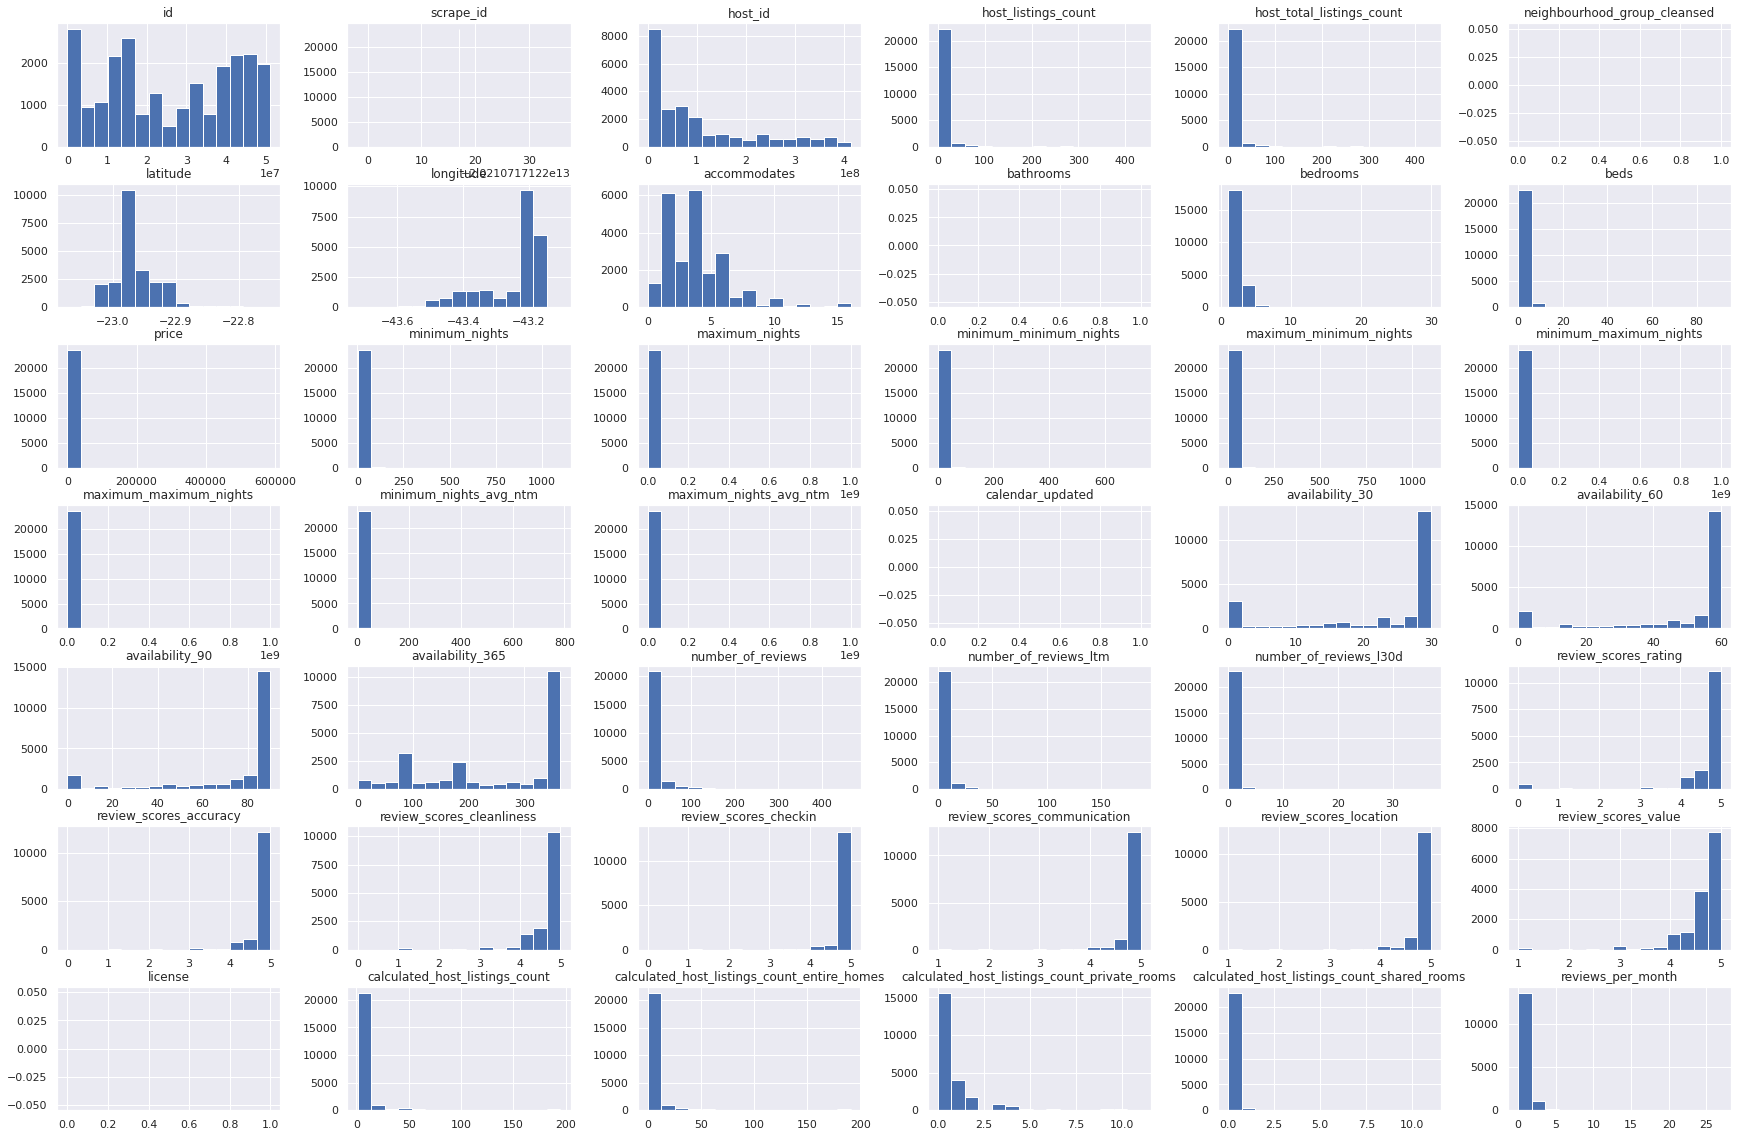

In [ ]:
df.hist(bins=15, figsize=(30,20));
sns.set()

Observe que os dados não estão bem distribuídos, bem como há faz-se necessário as exclusão de colunas faltantes pois prejudicam a visualização dos histogramas. 

#INFORMAÇÕES ESTATISTICA

In [ ]:
#função para limpeza de caracter na coluna, retirando o $
def removeSymbol(value):
    value = value.replace('$', ' ').strip()
    value = value.replace(',', '')
    return value
#aplicando a função
df['price']= df['price'].apply(removeSymbol)  


In [ ]:
#mudando a entrada do dado para  tipo float
df['price'] = df['price'].astype('float')

#Outliers

In [ ]:
df[["price", "minimum_nights", "number_of_reviews", 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23635.000000,23635.000000,23635.000000,14980.000000,23635.000000,23635.000000
mean,751.329300,4.919018,13.207489,0.602536,7.396361,246.030379
std,5477.207312,20.702676,31.962546,0.864291,22.759622,123.474424
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.000000,0.000000,0.090000,1.000000,130.000000
50%,256.000000,2.000000,2.000000,0.240000,1.000000,297.000000
75%,511.000000,4.000000,10.000000,0.790000,3.000000,364.000000
max,586229.000000,1100.000000,466.000000,26.960000,195.000000,365.000000


Observe a cima que há erros no dataset, o máximo de noites mínimas (1.100)(minimum_nights) ultrapassa o valor total de dias, sendo necessário realizar a limpeza dos dados quanto a isso.

In [ ]:
df['price'].mean()

751.3292997672943

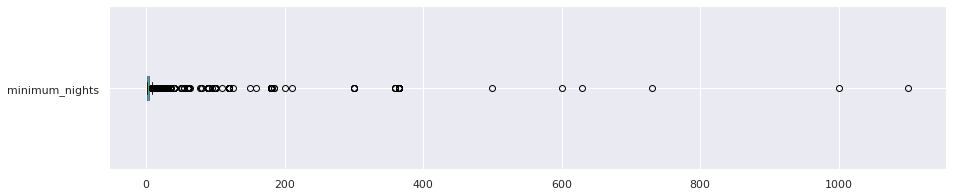

minimum_nights: valores acima de 30:
Entradas: 202
0.8547%


In [ ]:

df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show();

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print(f'Entradas: {len(df[df.minimum_nights > 30])}')
print(f'{(len(df[df.minimum_nights > 30 ])/df.shape[0])*100:.4f}%')

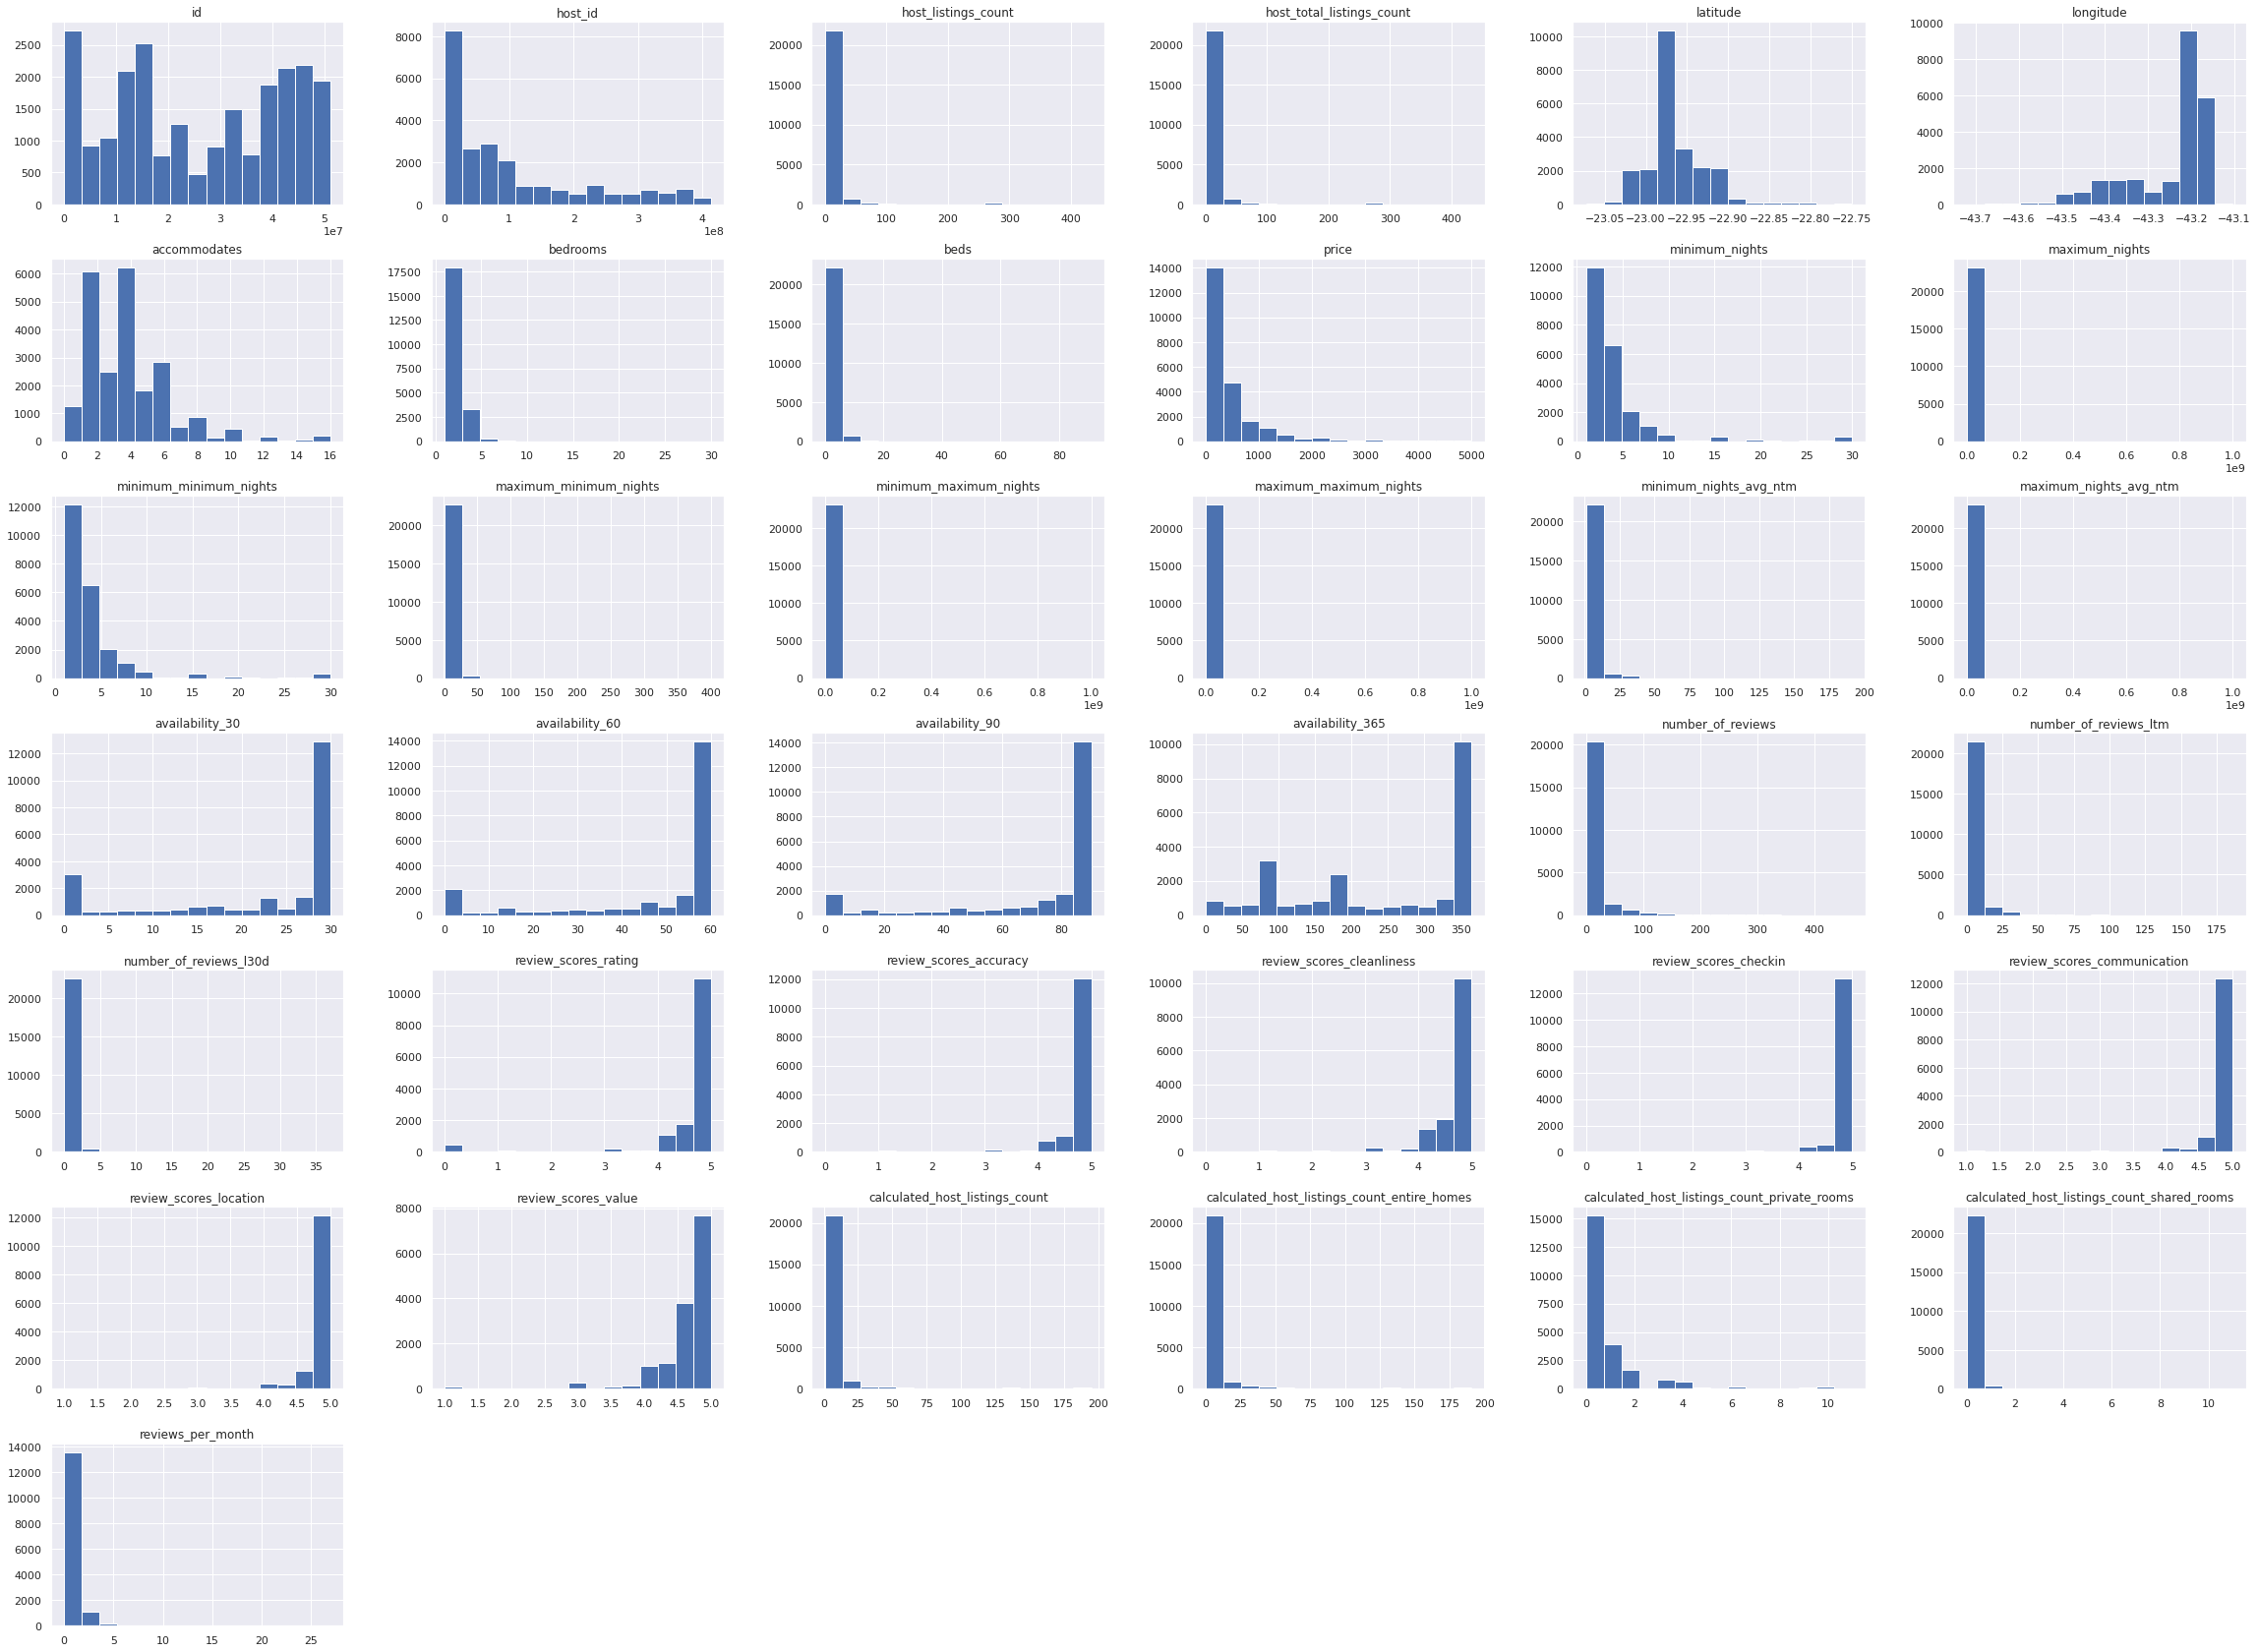

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 5000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover variaveis vazias

df_clean.drop('license', axis=1, inplace=True)
df_clean.drop('scrape_id', axis=1, inplace=True)
df_clean.drop('bathrooms', axis=1, inplace=True)
df_clean.drop('calendar_updated', axis=1, inplace=True)
df_clean.drop('neighbourhood_group_cleansed', axis=1, inplace=True)

#plotar novamente o histograma
df_clean.hist(bins=15, figsize=(40,30))
sns.set()

In [ ]:

# plot da matriz de correlação


correlation = df_clean[["price", "minimum_nights", "number_of_reviews", 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(correlation)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.126384,-0.143861,-0.137948,0.056260,0.132173
minimum_nights,0.126384,1.000000,-0.071868,-0.095530,-0.051142,0.019787
number_of_reviews,-0.143861,-0.071868,1.000000,0.638185,-0.052370,-0.143901
reviews_per_month,-0.137948,-0.095530,0.638185,1.000000,-0.004561,-0.192716
calculated_host_listings_count,0.056260,-0.051142,-0.052370,-0.004561,1.000000,0.010451
availability_365,0.132173,0.019787,-0.143901,-0.192716,0.010451,1.000000


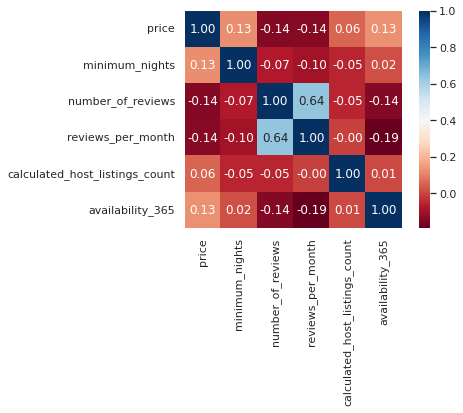

In [ ]:
sns.heatmap(correlation, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

#IMÓVEIS 

Agora iremos analisar qual o tipo de imovel mais alugado

In [ ]:

#conta variaveis categoricas 
df_clean.room_type.value_counts()

Entire home/apt    16746
Private room        5773
Shared room          521
Hotel room            83
Name: room_type, dtype: int64

In [ ]:
#porcentagem
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.724214
Private room       0.249665
Shared room        0.022532
Hotel room         0.003589
Name: room_type, dtype: float64

Região mais cara:

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Copacaban, Rio de Janeiro, Brazil                          2471.000000
Rio de Janeiro, Rio de  Janeiro, Brazil                    2000.000000
Joá, Rio de Janeiro, Brazil                                1605.904762
Rj , Rio de Janeiro, Brazil                                1350.000000
Recreio dos Bandeirantes, Rio de Janeiro/ RJ, Brazil       1250.000000
Alto da Boa Vista, Rio de Janeiro, Brazil                  1215.500000
Teresopolis, Rio de Janeiro, Brazil                        1200.000000
Rio e Janeiro - Barra da Tijuca, Rio de Janeiro, Brazil    1200.000000
Rio de Janeiro,, Rio de Janeiro, Brazil                    1176.000000
Joatinga, Rio de Janeiro, Brazil                           1169.000000
Name: price, dtype: float64

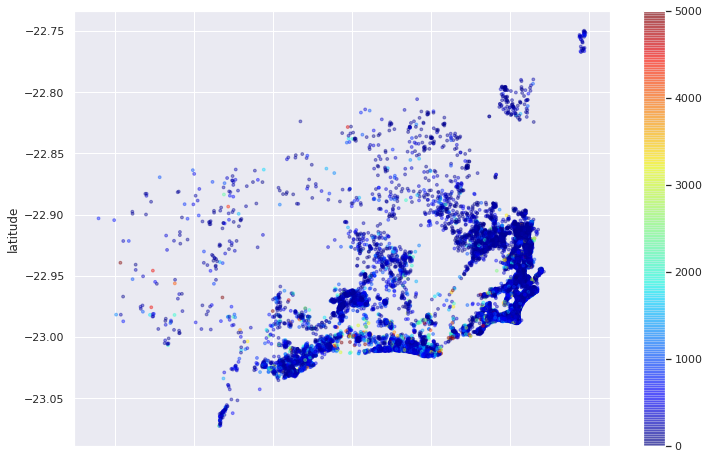

In [ ]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

#CONCLUSÃO

Em análise aos dados disponibilizados no site do AIRBNB, foi possível observar os outliers e colunas vazias, o que acarretou em uma necessidade de tratamento dos dados.

Os imóveis que mais tendem a ser alugados no AirBnb são apartamentos, correspondendo a 72% dos dados, um número bastante expressivo, o que seria mais vantajoso para um negócio disponibilizar apartamentos na plataforma.

O Bairro mais caro para se alugar é Copacabana, tendo uma média de  aluguel de R$ 2.400,00.

